In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import letters_batch
sess = tf.InteractiveSession()

In [4]:
btch = letters_batch.Batcher(size=28)

(784,)

In [7]:
x = ft.placeholder(tf.float32, shape=[None,784])
y_ = tf.placeholder(tf.float32, shape=[None,50])

W = tf.Variable(tf.zeros([784,50]),name='W')
b = tf.Variable(tf.zeros([50]), name='b')

In [8]:
def weight_variable(shape, name):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial, name=name)

def bias_variable(shape, name):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, name=name)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [9]:
#first convolutional layer
W_conv1 = weight_variable([5,5,1,32], name='W_conv1')
b_conv1 = bias_variable([32], name='b_conv1')

x_image = tf.reshape(x, [-1,28,28,1]) #2,3d - image dimensions, 4d - color channels

h_conv1 = tf.nn.tanh(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [10]:
#second conv layer
W_conv2 = weight_variable([5,5,32,64], name='W_conv2')
b_conv2 = bias_variable([64], name='b_conv2')

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [11]:
#Densely connecter layer
W_fc1 = weight_variable([7*7*64, 1024],'W_fc1')
b_fc1 = bias_variable([1024],'b_fc1')

h_pool2_flat = tf.reshape(h_pool2, [-1,7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [12]:
#Dropout

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [13]:
#Softmax

W_fc2 = weight_variable([1024,50], name='W_fc2')
b_fc2 = bias_variable([50], name='b_fc2')

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

In [11]:
#Training

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

test_batch = btch.get_test()

for i in range(1500):
  batch = btch.get_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: test_batch[0], y_: test_batch[1], keep_prob: 1.0}))

step 0, training accuracy 0.02
step 100, training accuracy 0.64
step 200, training accuracy 0.88
step 300, training accuracy 0.94
step 400, training accuracy 0.96
step 500, training accuracy 0.98
step 600, training accuracy 0.92
step 700, training accuracy 1
step 800, training accuracy 0.92
step 900, training accuracy 1
step 1000, training accuracy 1
step 1100, training accuracy 1
step 1200, training accuracy 1
step 1300, training accuracy 0.98
step 1400, training accuracy 1
test accuracy 0.96


In [15]:
def black_box(x_img):
    """predict class of the 28x28 image x"""
    return y_conv.eval(session=sess, feed_dict={x: x_img, keep_prob: 0.5})

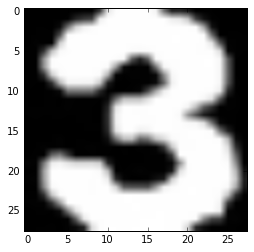

In [42]:
%matplotlib inline
test_batch = btch.get_batch(1)
image = test_batch[0]
label = test_batch[1]
plt.imshow(image[0].reshape(28,28), cmap='Greys_r')

In [43]:
print btch.letters[np.argmax(black_box(image))]

Z


In [16]:
saver = tf.train.Saver()
save_path = saver.save(sess, "./Deep/Net1.ckpt")
print "model saved in %s" % save_path

model saved in ./Deep/Net1.ckpt


In [14]:
saver = tf.train.Saver()
saver.restore(sess, "/home/wolterlw/Desktop/bills/Deep/Net1.ckpt")

In [ ]:
(W_conv1_np == sess.run(W_conv1)).all()